<a href="https://colab.research.google.com/github/davkeem/SHAZAM-CAPSTONE/blob/main/shazam_query_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
import os


drive.mount('/content/drive')

hist_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/hist_data'


chroma_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_chroma/ml_processed_data'
harmonic_data_folder ='/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_harmonic/ml_processed_data'
mfcc_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/mfcc'
onset_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_onset/ml_processed_data'
percussive_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_percussive/ml_processed_data'
spectral_centroid_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_spectral_centroid/ml_processed_data'
spectral_contrast_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_spectral_contrast/ml_processed_data'
tempo_beats_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/dataset_processed/processed_tempo_beats/ml_processed_data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This loads the csv files, skips the first row and column of labels, and pads the histogram array to match up with the mfcc array.

Expected data shapes:
X shape: (20, 550, 14)
y shape: (20, 550, 1)

In [28]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(directory):
    data = []
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path, header=None, skiprows=1)
            # Clean the data to remove brackets and convert to float
            df = df.replace(r'[\[\]]', '', regex=True).astype(float) #Tempo beats data has brackets
            data.append(df.iloc[:, 1:].values)  # Exclude the time bin column
    max_length = max(array.shape[0] for array in data)  # Find the max length
    padded_data = pad_sequences(data, maxlen=max_length, padding='post', dtype='float32')  # Pad sequences
    return np.array(padded_data)

# Load data from all specified folders
mfcc_data = load_data(mfcc_data_folder)
hist_data = load_data(hist_data_folder)
chroma_data = load_data(chroma_data_folder)
harmonic_data = load_data(harmonic_data_folder)
onset_data = load_data(onset_data_folder)
percussive_data = load_data(percussive_data_folder)
spectral_centroid_data = load_data(spectral_centroid_data_folder)
spectral_contrast_data = load_data(spectral_contrast_data_folder)
tempo_beats_data = load_data(tempo_beats_data_folder)

print(f"MFCC Data Shape: {mfcc_data.shape}")
print(f"Histogram Data Shape: {hist_data.shape}")
print(f"Chroma Data Shape: {chroma_data.shape}")
print(f"Harmonic Data Shape: {harmonic_data.shape}")
print(f"Onset Data Shape: {onset_data.shape}")
print(f"Percussive Data Shape: {percussive_data.shape}")
print(f"Spectral Centroid Data Shape: {spectral_centroid_data.shape}")
print(f"Spectral Contrast Data Shape: {spectral_contrast_data.shape}")
print(f"Tempo Beats Data Shape: {tempo_beats_data.shape}")

# Concatenate all the feature datasets into X
X = np.concatenate(
    [
        mfcc_data,
        chroma_data,
        harmonic_data,
        onset_data,
        percussive_data,
        spectral_centroid_data,
        spectral_contrast_data,
        tempo_beats_data,
    ],
    axis=2,  # Concatenate along the feature axis
)

# Set y to be the histogram data
y = hist_data

# Print shapes for verification
print(f"X shape: {X.shape}")  # Combined features: (num_samples, time_steps, total_features)
print(f"y shape: {y.shape}")  # Labels: (num_samples, time_steps)





MFCC Data Shape: (20, 550, 14)
Histogram Data Shape: (20, 550, 1)
Chroma Data Shape: (20, 550, 13)
Harmonic Data Shape: (20, 550, 14)
Onset Data Shape: (20, 550, 2)
Percussive Data Shape: (20, 550, 14)
Spectral Centroid Data Shape: (20, 550, 2)
Spectral Contrast Data Shape: (20, 550, 8)
Tempo Beats Data Shape: (20, 550, 3)
X shape: (20, 550, 14)
y shape: (20, 550, 1)


Work In Progress

My first attempt at LOO (Leave One Out) Cross Validation modeling.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1: Leaving out song at index 0
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6061506.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 5370756.0000
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 4763958.0000
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 4238284.0000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 3748455.2500
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 3290434.0000
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 2913579.7500
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 2553187.0000
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - loss: 2228687.2500
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - loss: 1954660.3750
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 1733028.2500
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - loss: 1542898.1250
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - loss: 1395323.3750
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

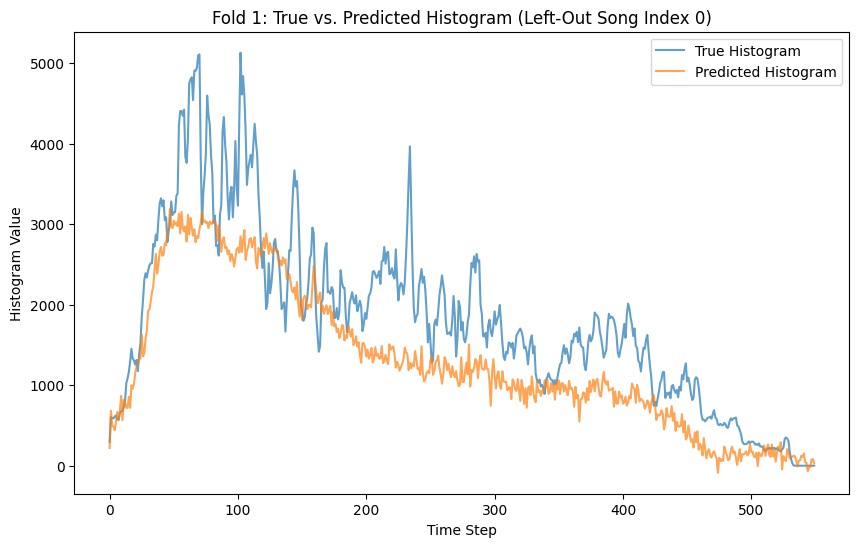

Fold 2: Leaving out song at index 1
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 689113.4375
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 690089.4375
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 675880.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 664145.9375
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 656408.4375
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 645760.4375
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 642177.1875
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - loss: 639978.8125
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - loss: 631767.3750
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - loss: 624033.3125
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 616233.6875
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - loss: 615244.2500
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 605572.8125
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step

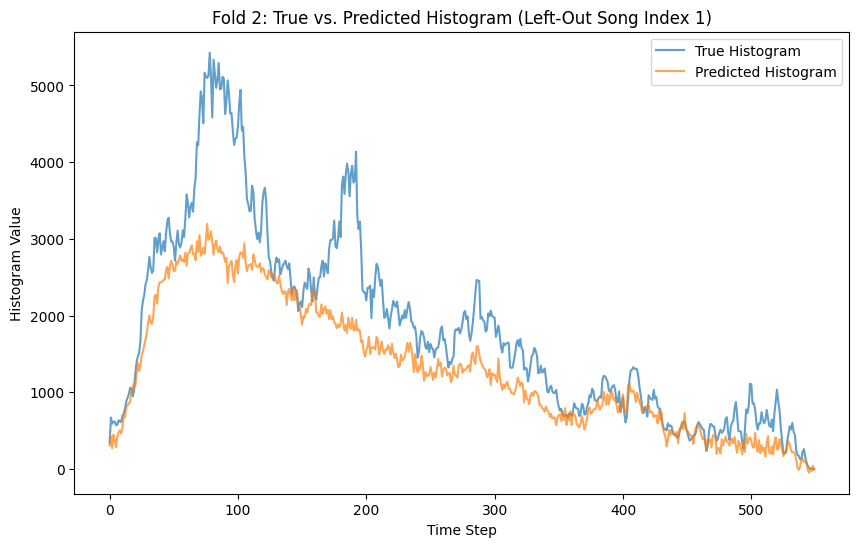

Fold 3: Leaving out song at index 2
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 451004.5938
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - loss: 441421.4688
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 443282.5938
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - loss: 437213.3750
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 437733.3438
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 429817.2188
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 434253.7500
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - loss: 423782.2812
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 419207.0938
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 417923.7188
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 409098.5938
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 408823.5938
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 404738.0000
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step

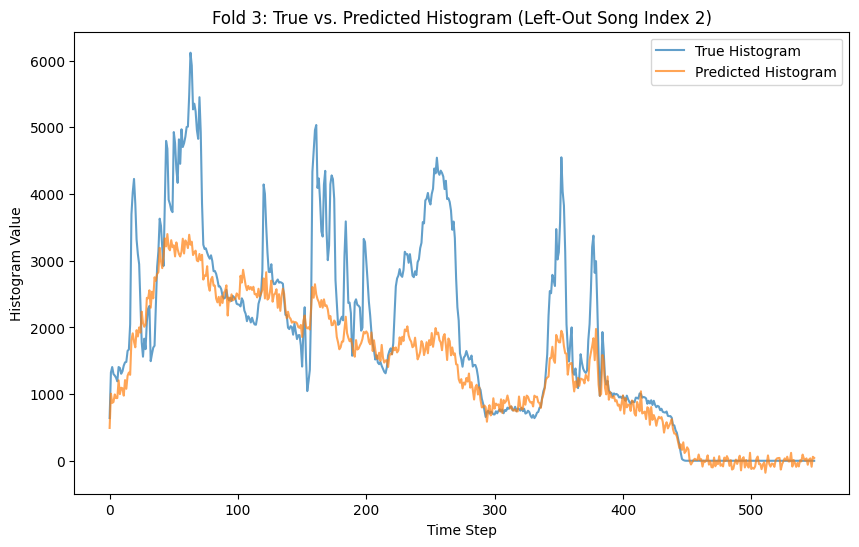

Fold 4: Leaving out song at index 3
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - loss: 304983.3125
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 305802.0312
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 293918.9375
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - loss: 300490.5938
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 299004.0938
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 285349.4688
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - loss: 279666.5938
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 280247.5938
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 285969.3750
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 270786.3125
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 270093.0625
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 277251.5938
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 266861.4375
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

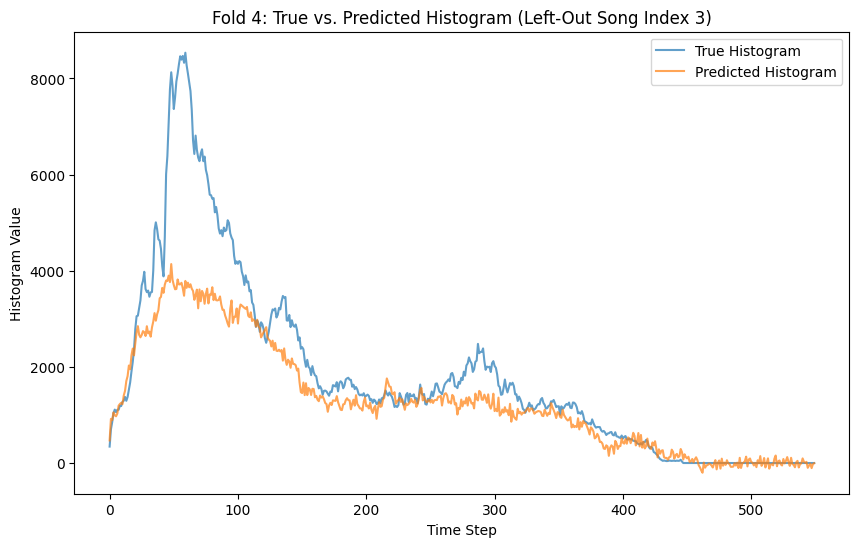

Fold 5: Leaving out song at index 4
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - loss: 256576.8906
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 250194.2656
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - loss: 250645.4219
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 245910.1094
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - loss: 238490.2344
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - loss: 239381.1250
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - loss: 235420.3750
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 240559.7969
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 237827.3125
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 232381.5781
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 234617.8906
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 229034.5469
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 225960.2656
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step

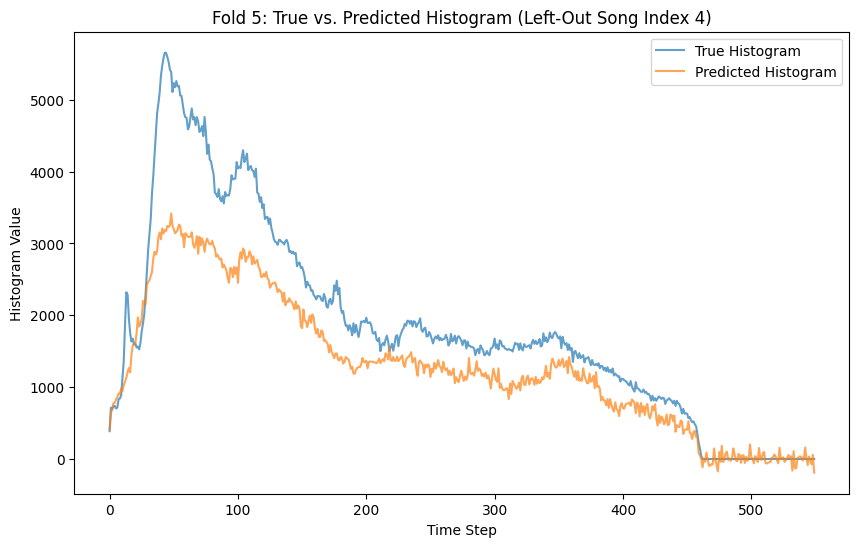

Fold 6: Leaving out song at index 5
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 178476.2969
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - loss: 172814.2031
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 168643.9531
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 175386.9688
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - loss: 167605.2969
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 170084.5000
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - loss: 171362.9375
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 164568.4531
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 162992.0312
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 165566.0469
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 164831.6094
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 159236.6875
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 159602.8281
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step

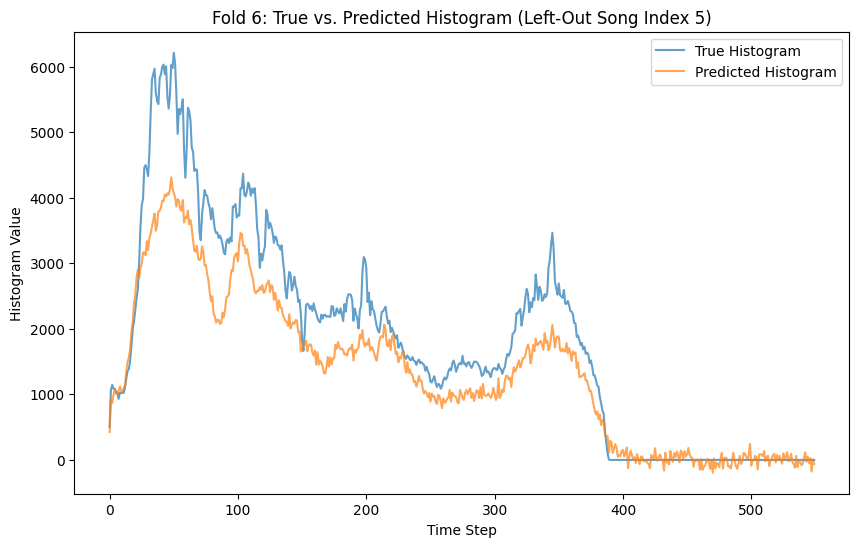

Fold 7: Leaving out song at index 6
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 151659.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 153606.5781
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 153173.2812
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 152678.4062
Test MSE for this fold: 391353.46875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 625.58251953125


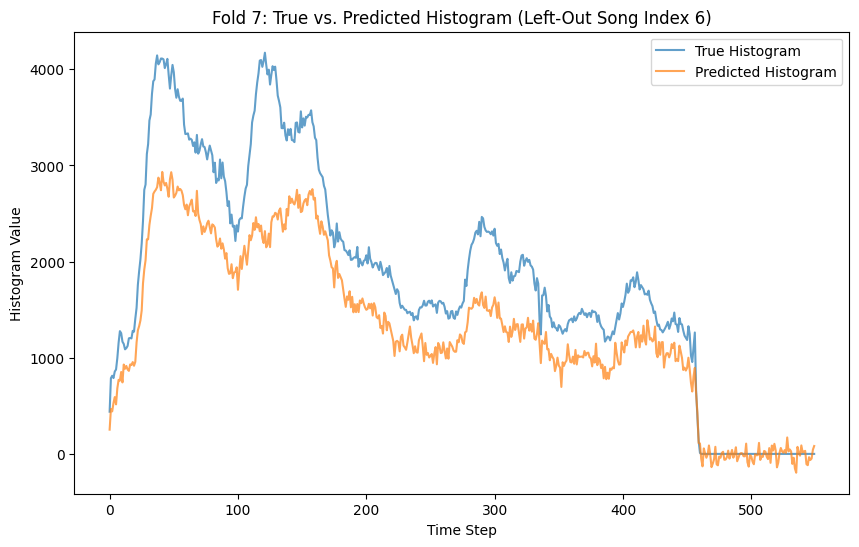

Fold 8: Leaving out song at index 7
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 148894.3906
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 145335.3906
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - loss: 140931.1562
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - loss: 142642.7500
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - loss: 142713.3906
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - loss: 144235.1875
Test MSE for this fold: 647453.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test RMSE for this fold: 804.6450805664062


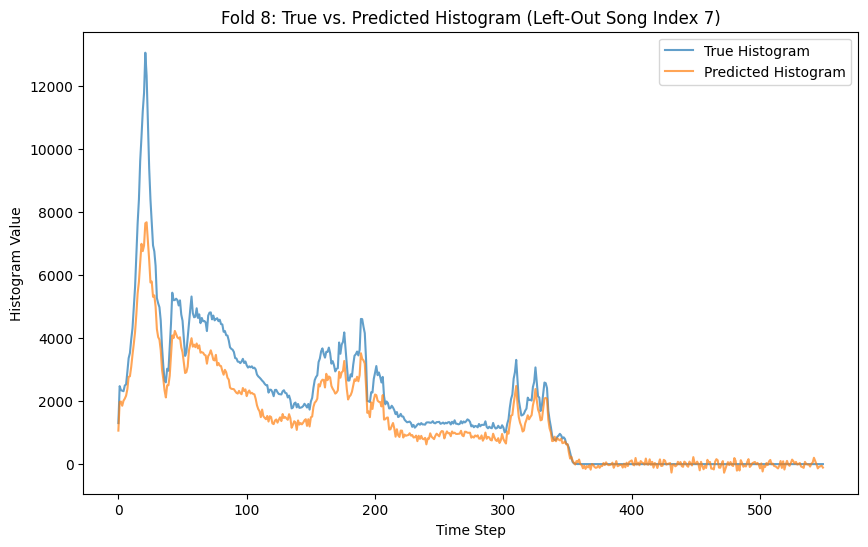

Fold 9: Leaving out song at index 8
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - loss: 141494.8906
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - loss: 146500.1250
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - loss: 140465.6875
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 140977.3281
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - loss: 146651.6094
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 138280.3906
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 138803.7188
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 137631.5938
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 138231.7188
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 135591.6094
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 135427.6094
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 134172.9375
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 132996.8750
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step

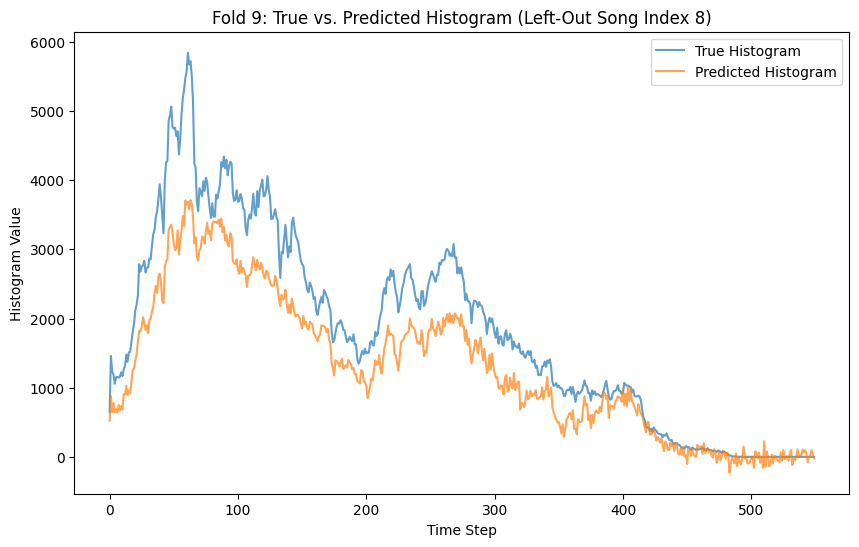

Fold 10: Leaving out song at index 9
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - loss: 124101.2500
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 114882.8984
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - loss: 117907.1016
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - loss: 117509.8281
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - loss: 116606.5156
Test MSE for this fold: 639623.1875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test RMSE for this fold: 799.7644653320312


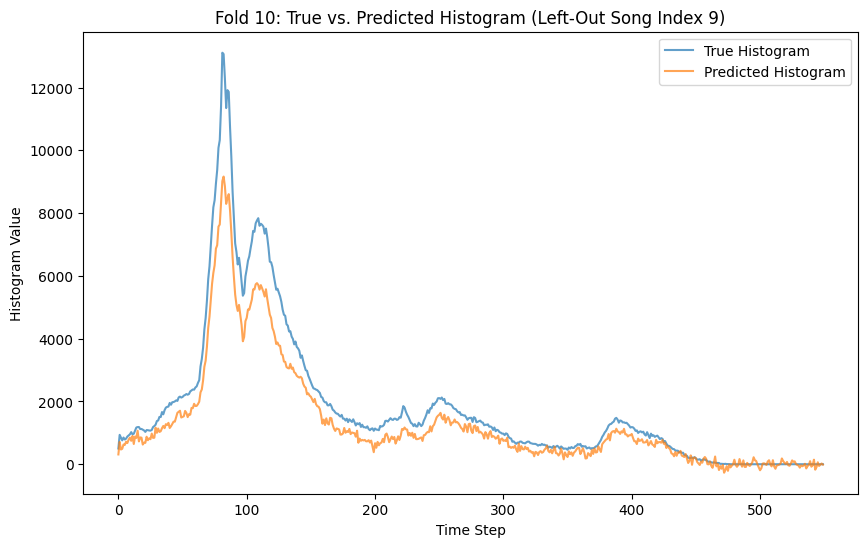

Fold 11: Leaving out song at index 10
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 117795.2656
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 120054.5391
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - loss: 115030.4375
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 112910.9219
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - loss: 117476.2891
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 113907.8672
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 114237.1875
Test MSE for this fold: 534142.625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test RMSE for this fold: 730.8506469726562


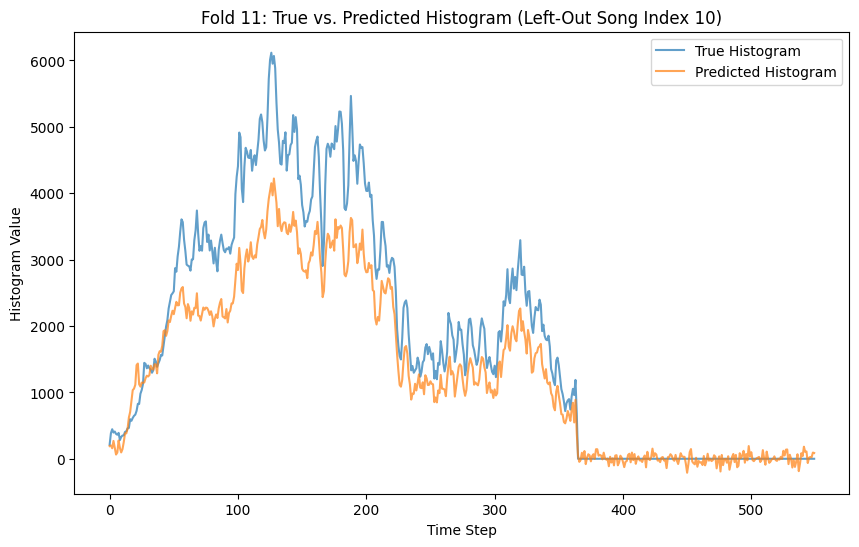

Fold 12: Leaving out song at index 11
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - loss: 115641.2656
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 114896.0000
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 110448.7344
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 111825.4219
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - loss: 108668.0547
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - loss: 108445.7891
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - loss: 107961.5781
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - loss: 108588.3594
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 111681.1562
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - loss: 107474.0781
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 110101.1797
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 109486.5781
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - loss: 109616.4297
Test MSE for this fold: 526640.875
1/1 ━━━━━━━━━

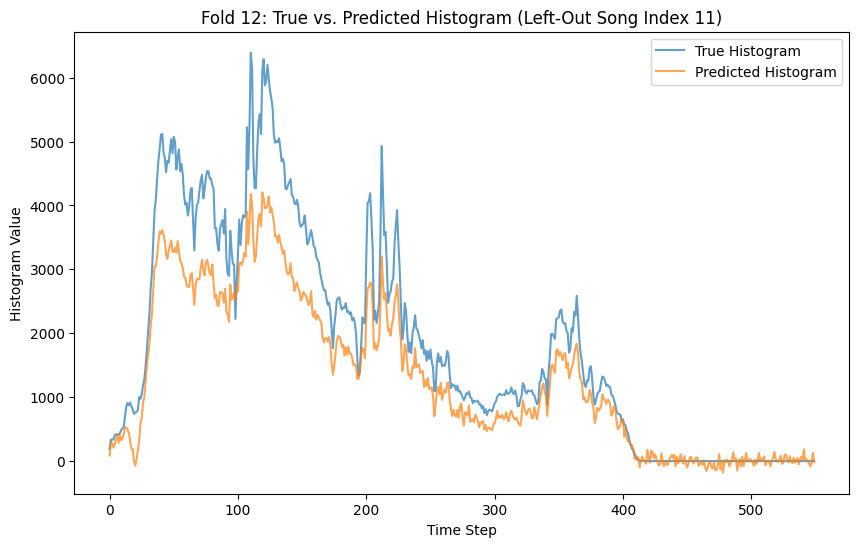

Fold 13: Leaving out song at index 12
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 109004.3672
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 109453.6875
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 109584.5859
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 104130.5703
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 107831.3125
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - loss: 106104.7344
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step - loss: 106435.6641
Test MSE for this fold: 443668.4375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test RMSE for this fold: 666.0844116210938


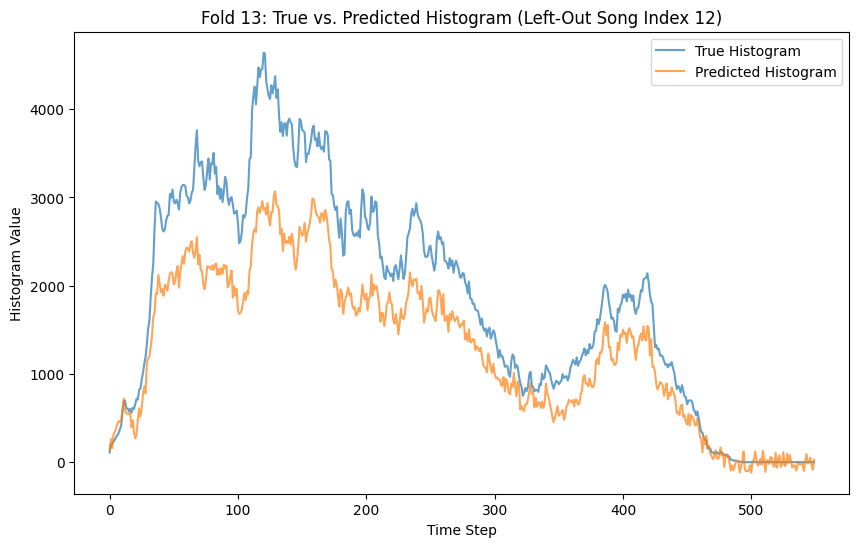

Fold 14: Leaving out song at index 13
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 107689.3516
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - loss: 107872.5547
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - loss: 104357.5625
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - loss: 104103.0078
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - loss: 103995.1016
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - loss: 102987.9062
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - loss: 101252.7969
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 99890.8516
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 105037.2266
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 103258.9062
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 103946.3125
Test MSE for this fold: 543194.875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test RMSE for this fold: 737.017578125


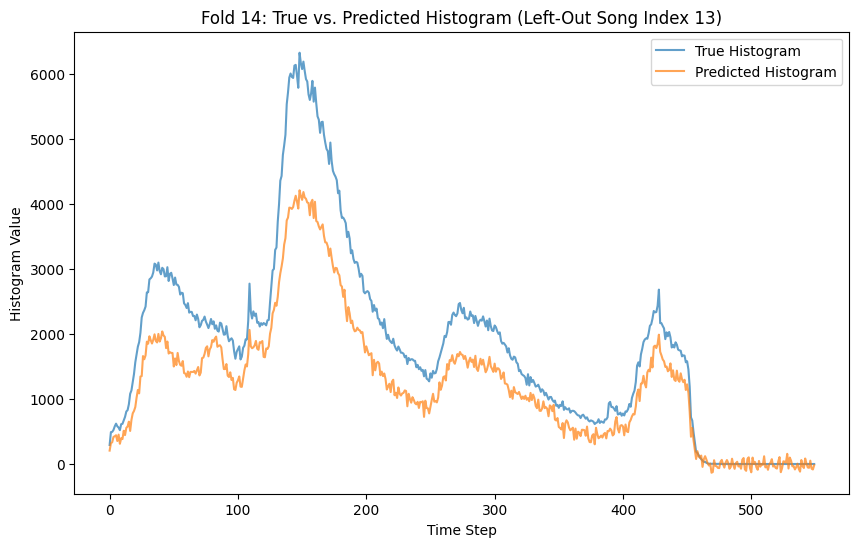

Fold 15: Leaving out song at index 14
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 97341.3828
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 100577.0625
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 100952.4453
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step - loss: 104390.0000
Test MSE for this fold: 539196.375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test RMSE for this fold: 734.2998657226562


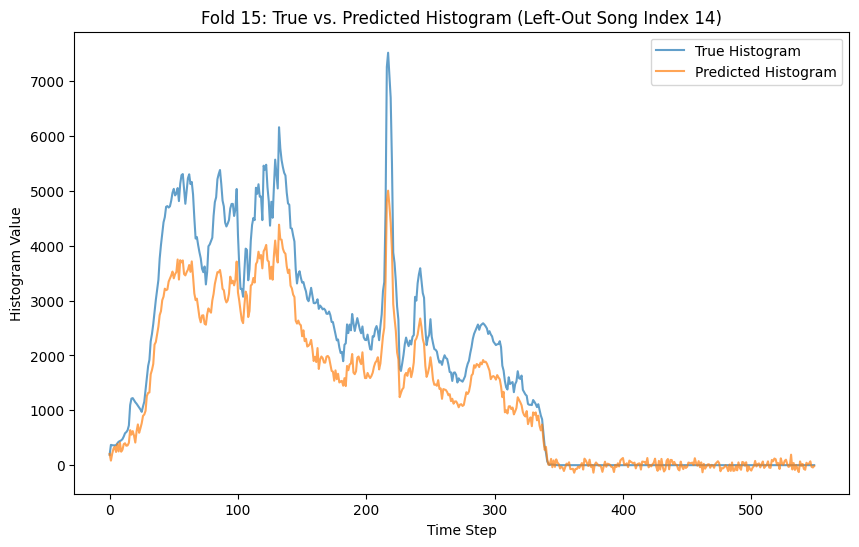

Fold 16: Leaving out song at index 15
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 96964.7812
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 97758.5781
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - loss: 97537.8984
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - loss: 100408.1328
Test MSE for this fold: 516100.375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 718.4013061523438


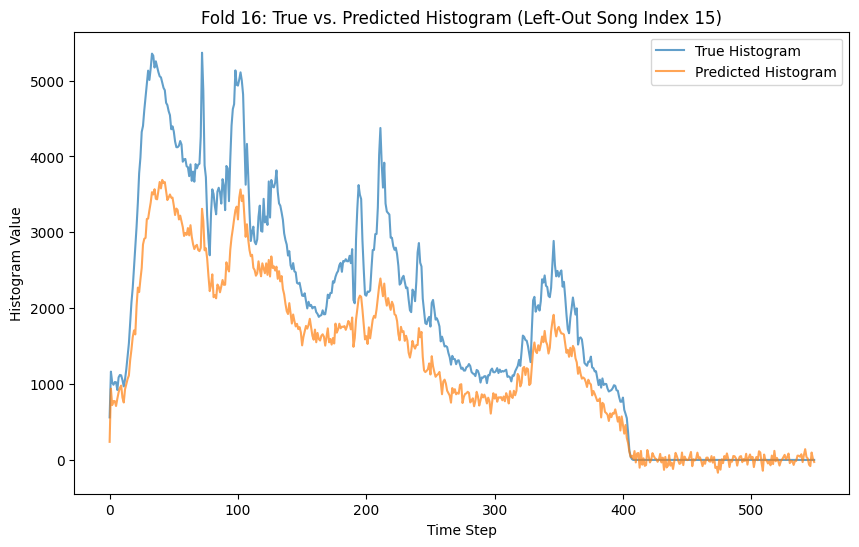

Fold 17: Leaving out song at index 16
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - loss: 97371.6953
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 100906.8750
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 101019.8594
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - loss: 98255.7109
Test MSE for this fold: 520021.125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test RMSE for this fold: 721.1248779296875


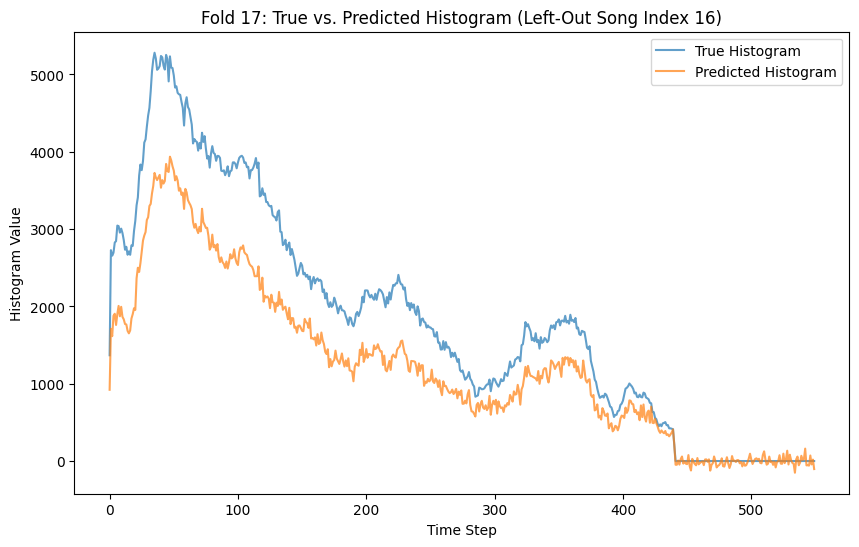

Fold 18: Leaving out song at index 17
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 94460.8281
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 95139.5078
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - loss: 92995.0000
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 95363.5000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - loss: 96133.2578
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - loss: 94282.5234
Test MSE for this fold: 514345.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test RMSE for this fold: 717.1790161132812


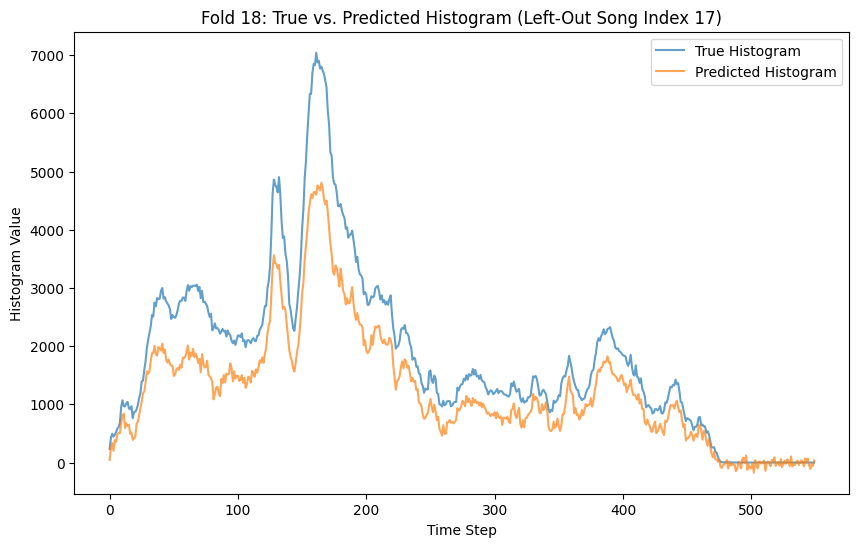

Fold 19: Leaving out song at index 18
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 90961.4375
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 93801.5078
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 97466.4297
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 91937.8125
Test MSE for this fold: 536960.5625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Test RMSE for this fold: 732.7759399414062


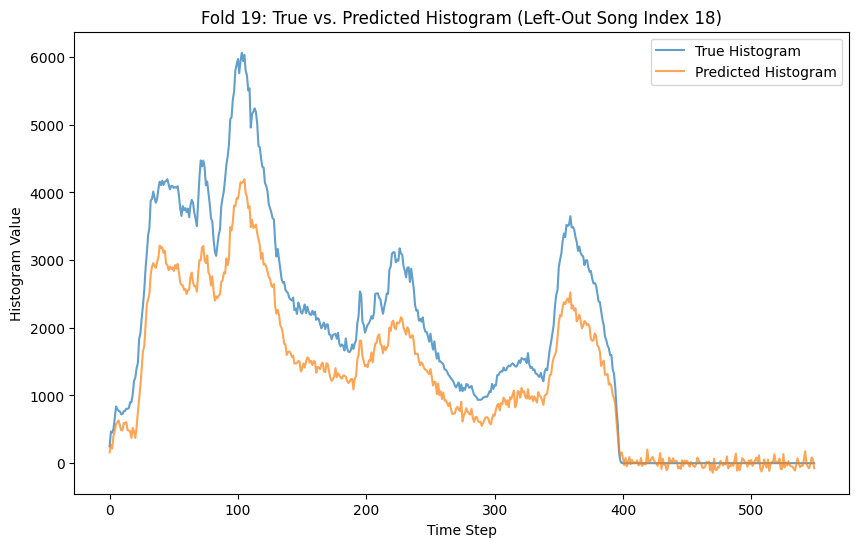

Fold 20: Leaving out song at index 19
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - loss: 94008.5234
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - loss: 90297.6328
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 91921.6094
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - loss: 88196.9453
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - loss: 91421.2109
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step - loss: 90222.4375
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - loss: 87235.8672
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 87639.3906
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 86693.3047
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 86748.2578
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 88656.1562
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - loss: 85598.8984
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - loss: 85047.7812
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 84

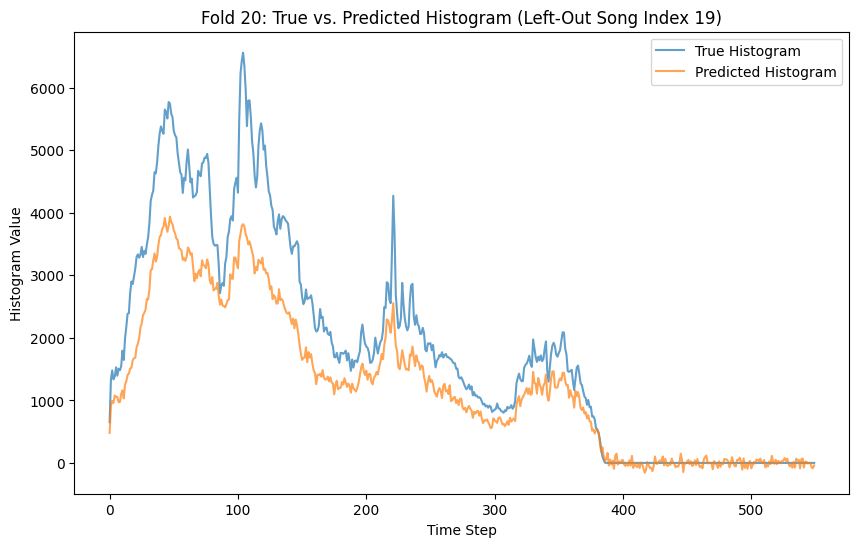

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

time_steps = X.shape[1]
features = X.shape[2]

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(550, activation='linear'))  # 550 max time steps
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Loop through each song for LOO CV and continue training
for fold_number, (train_index, test_index) in enumerate(loo.split(X), start=1):

    print(f"Fold {fold_number}: Leaving out song at index {test_index[0]}")
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test MSE for this fold: {loss}")

    # Make predictions
    y_pred = model.predict(X_test).flatten()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_pred))
    print(f"Test RMSE for this fold: {rmse}")

    # Plot the true vs. predicted histograms
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.flatten(), label='True Histogram', alpha=0.7)
    plt.plot(y_pred, label='Predicted Histogram', alpha=0.7)
    plt.xlabel('Time Step')
    plt.ylabel('Histogram Value')
    plt.title(f'Fold {fold_number}: True vs. Predicted Histogram (Left-Out Song Index {test_index[0]})')
    plt.legend()
    plt.show()

# Final Validation: Evaluate the model on all songs
#print("\n--- Final Validation ---")
#for i in range(len(X)):
    #y_pred_final = model.predict(np.expand_dims(X[i], axis=0)).flatten() #Need to add 1 to make it 3 parameters  again
    #rmse_final = np.sqrt(mean_squared_error(y[i].flatten(), y_pred_final))

    #print(f"Song {i+1} - Final Validation RMSE: {rmse_final}")

    # Plot the final true vs. predicted histograms
    #plt.figure(figsize=(10, 6))
    #plt.plot(y[i].flatten(), label='True Histogram', alpha=0.7)
    #plt.plot(y_pred_final, label='Predicted Histogram', alpha=0.7)
    #plt.xlabel('Time Step')
    #plt.ylabel('Histogram Value')
    #plt.title(f'Song {i+1} - Final True vs. Predicted Histogram')
    #plt.legend()
    #plt.show()
